In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
import os
from matplotlib import cm
from pandas.plotting import scatter_matrix
from mpl_toolkits.mplot3d import Axes3D
from sklearn.neighbors import KNeighborsClassifier


%matplotlib notebook

In [2]:
f = 'fruit_data_with_colors.txt'
fruits = pd.read_table(f)
fruits.head()

,fruit_label,fruit_name,fruit_subtype,mass,width,height,color_score
0,1,apple,granny_smith,192,8.4,7.3,0.55
1,1,apple,granny_smith,180,8.0,6.8,0.59
2,1,apple,granny_smith,176,7.4,7.2,0.60
3,2,mandarin,mandarin,86,6.2,4.7,0.80
4,2,mandarin,mandarin,84,6.0,4.6,0.79


In [3]:
# create fruit lable to name mapping for lookup
lookup_fruit_name = fruits.groupby('fruit_label').fruit_name.first().to_dict()
lookup_fruit_name

{1: 'apple', 2: 'mandarin', 3: 'orange', 4: 'lemon'}

In [4]:
#plot a scatter matrix
xcols = 'mass width height color_score'.split()
X = fruits[xcols]
y = fruits.fruit_label
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [5]:
X_train.head()

,mass,width,height,color_score
17,168,7.5,7.6,0.73
6,80,5.9,4.3,0.81
4,84,6.0,4.6,0.79
54,116,6.1,8.5,0.71
19,162,7.4,7.2,0.85


In [6]:
y_train.head()

17    1
6     2
4     2
54    4
19    1
Name: fruit_label, dtype: int64

<IPython.core.display.Javascript object>


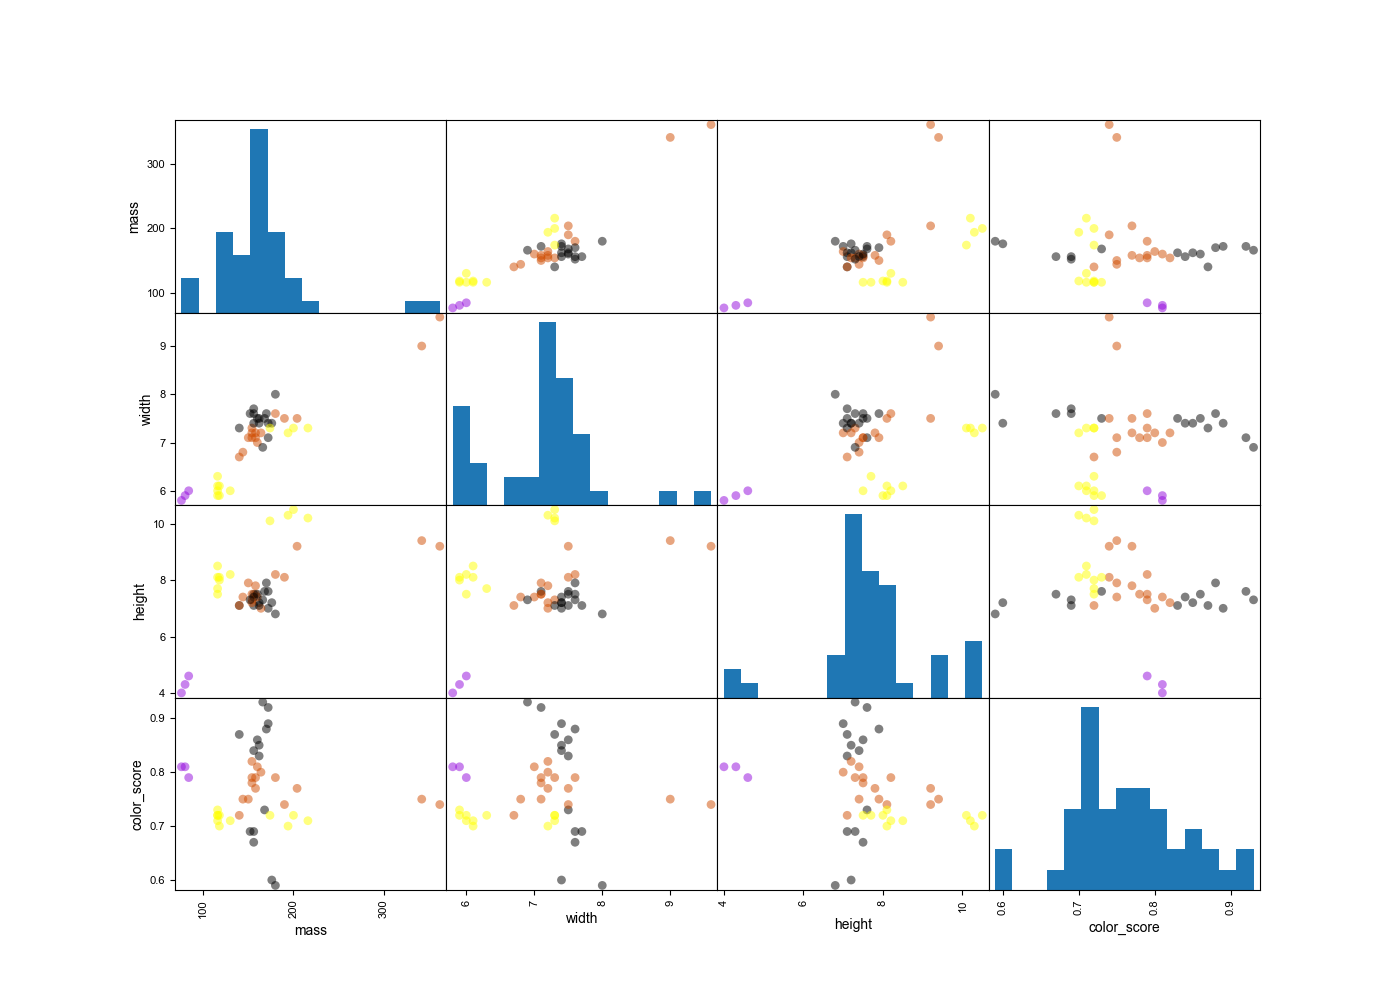

In [7]:
scatter_matrix(X_train, c=y_train, diagonal='hist', hist_kwds={'bins': 15}, marker='o', s=40, cmap=cm.gnuplot, figsize=(14,10));

<IPython.core.display.Javascript object>


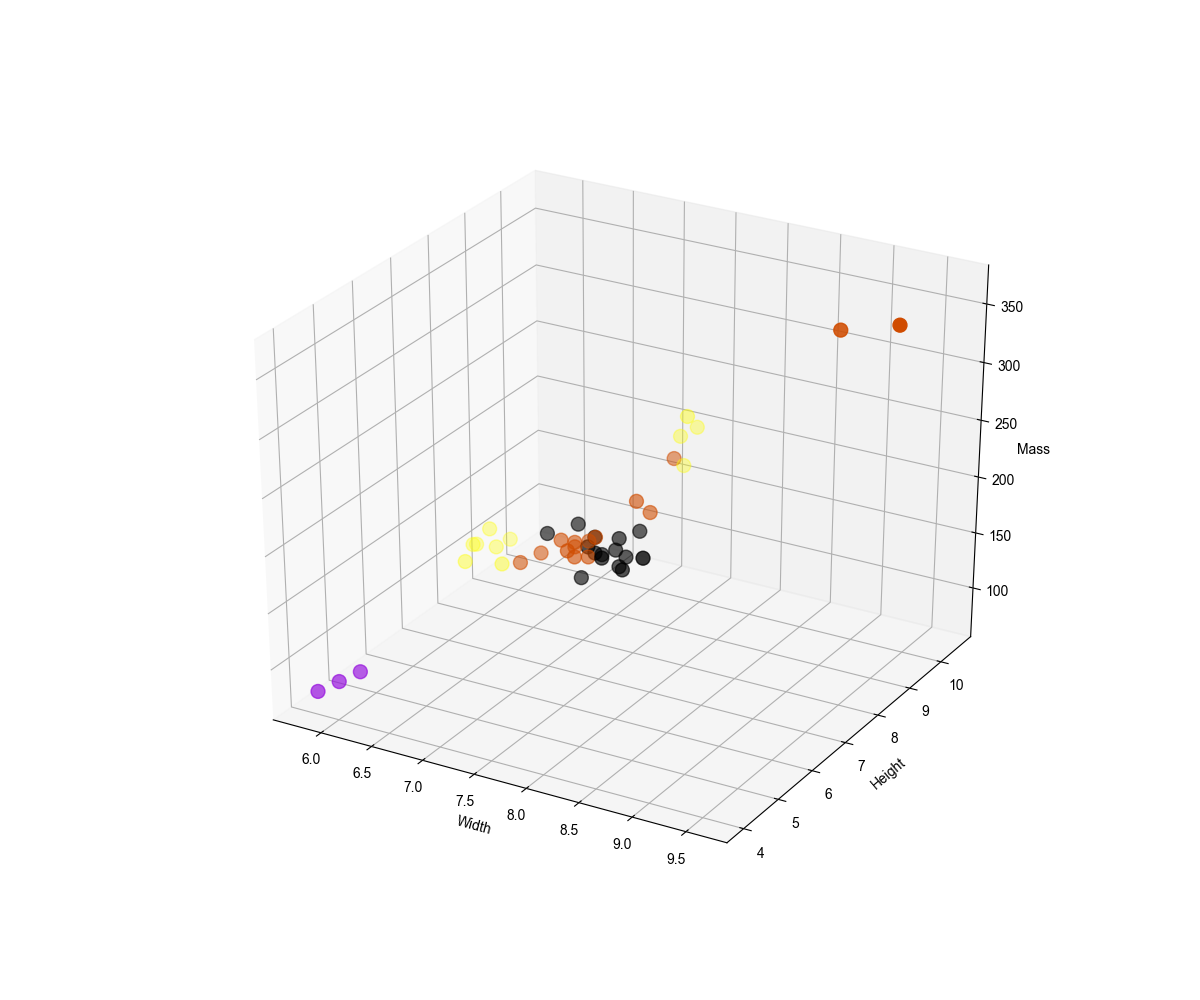

In [8]:
fig, ax = plt.subplots(figsize=(12,10), subplot_kw={'projection':'3d'})
ax.scatter3D(X_train.width, X_train.height, X_train.mass, c=y_train, marker='o', s=100, cmap=cm.gnuplot)
ax.set_xlabel('Width')
ax.set_ylabel('Height')
ax.set_zlabel('Mass');

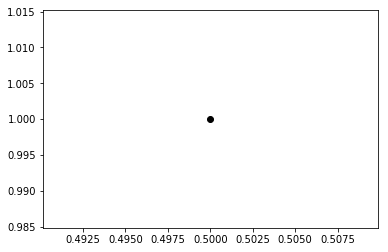

In [112]:
fig, ax = plt.subplots(figsize=(6, 4))
x = [.5]
y = [1]
ax.scatter(x, y, c=7, marker='o', cmap=cm.gnuplot)

In [10]:
y_train.min(), y_train.max()

(1, 4)

<IPython.core.display.Javascript object>


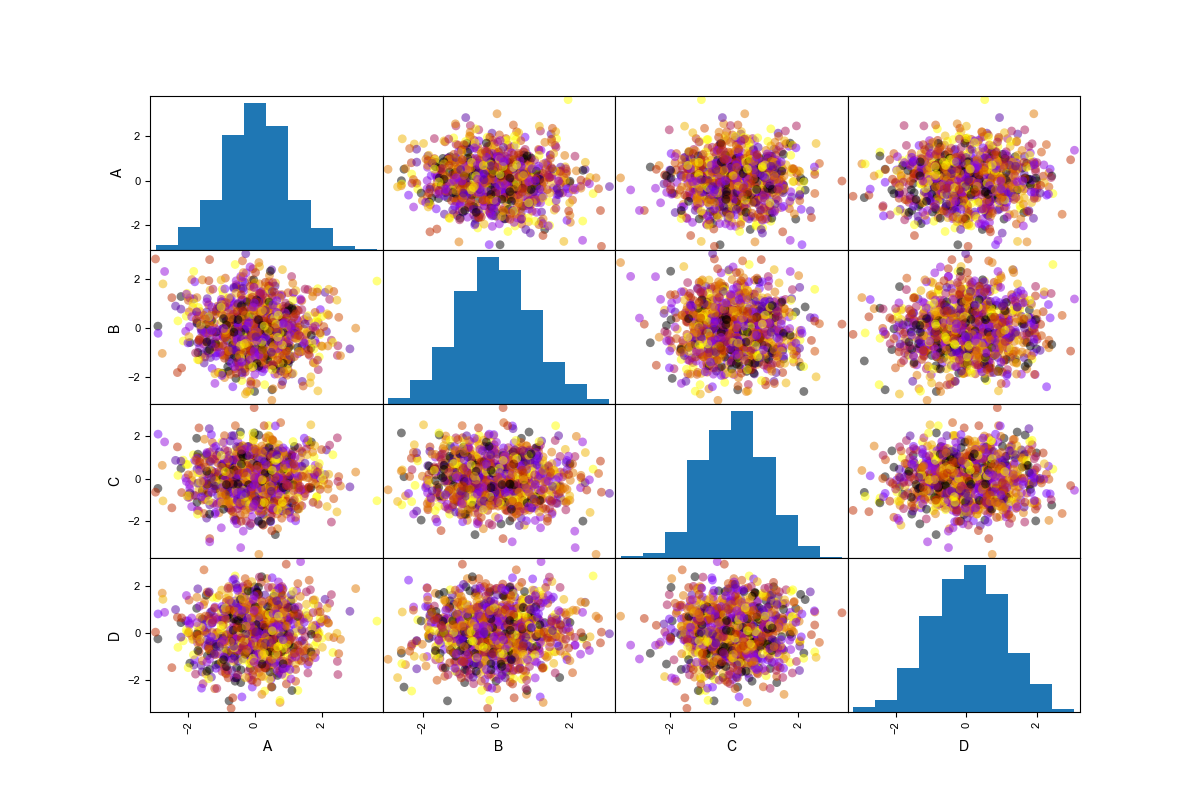

In [12]:
# learning scatter_matrix
df = pd.DataFrame(np.random.randn(1000, 4), columns=list('ABCD'))
c = np.random.randint(10, size=len(df))
df.head()
scatter_matrix(df, c = c, figsize=(12,8), grid=True, diagonal='hist', hist_kwds={'bins': 10}, cmap=cm.gnuplot, marker='o', s=40);

## Train, Test split

In [9]:
xcols = 'width height mass'.split()
X = fruits[xcols]
y = fruits.fruit_label

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)
len(X_train), len(X_test)

(44, 15)

In [10]:
# create a classifier
knn = KNeighborsClassifier(n_neighbors=5)

In [11]:
# train the classifier
knn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')

In [12]:
#estimate the accuracy of the model
knn.score(X_test, y_test)

0.53333333333333333

In [13]:
# predict 
X_predict = [[4.3, 5.5, 20], [100, 6.3, 8.5]]
r = knn.predict(X_predict)
#lookup_fruit_name[r[0]]
[lookup_fruit_name[v] for v in r]

['mandarin', 'mandarin']

<IPython.core.display.Javascript object>


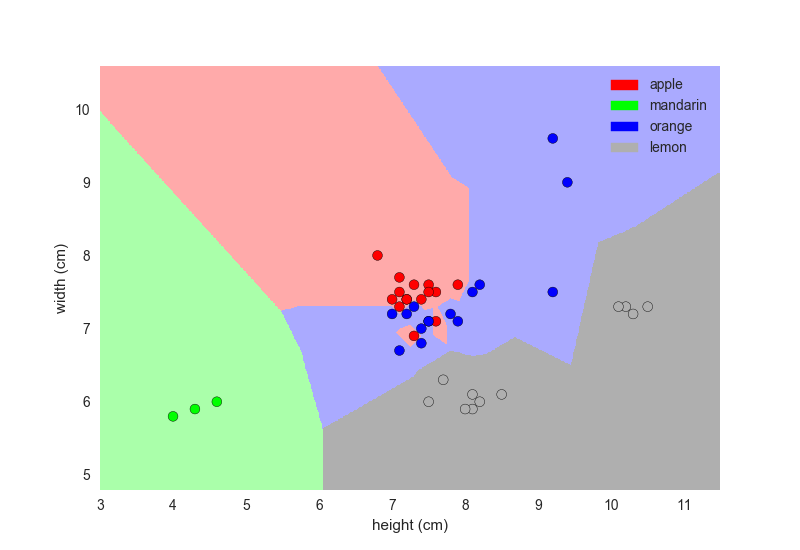

In [15]:
from adspy_shared_utilities import plot_fruit_knn
plot_fruit_knn(X_train, y_train, 1, 'uniform')

In [138]:
np.arange(10).reshape(2,5).ravel()

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

### How sensitive is k-NN classification accuracy to the choice of the 'k' parameter?

<IPython.core.display.Javascript object>


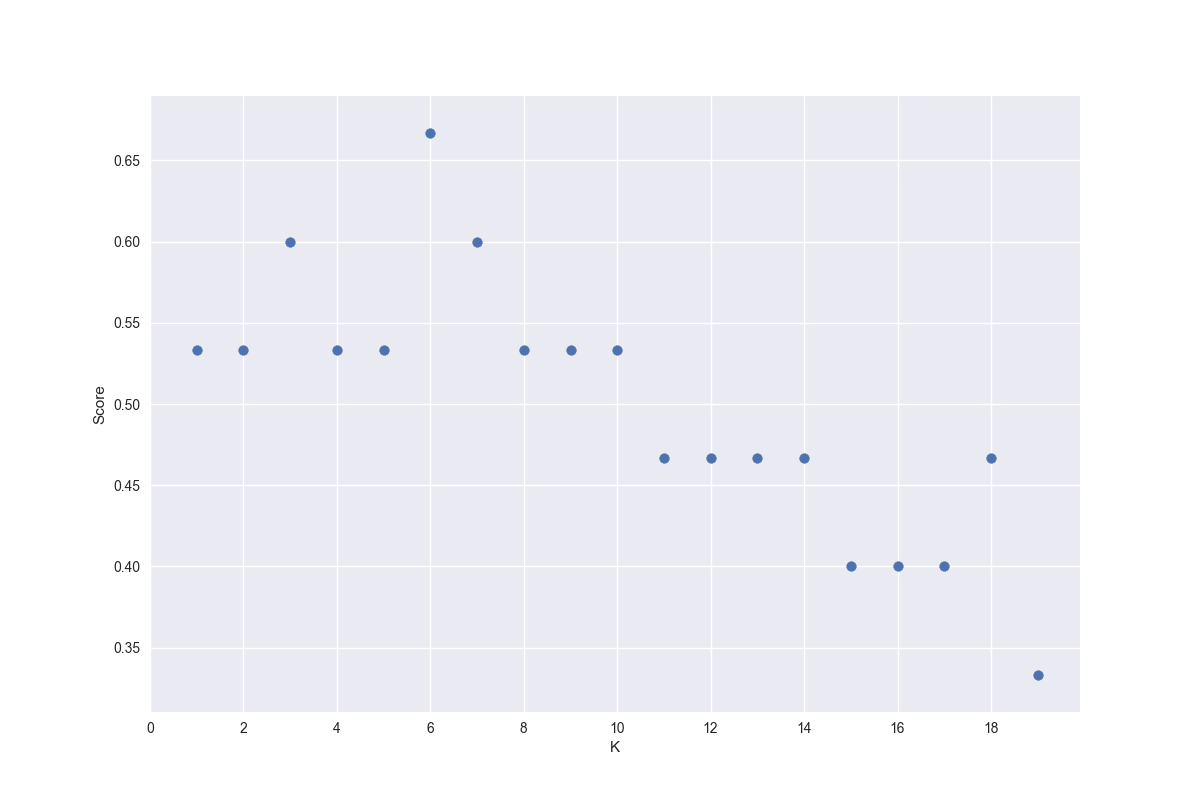

In [21]:
xcols = 'width height mass'.split()
X = fruits[xcols]
y = fruits.fruit_label
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

k_range = range(1,20)
scores = []
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    scores.append(knn.score(X_test, y_test))

fig, ax = plt.subplots(figsize=(12,8))
ax.scatter(k_range, scores)
ax.set_xlabel('K')
ax.set_ylabel('Score')
ax.set_xticks(range(0,max(k_range)+1, 2));

### How sensitive is k-NN classification accuracy to the train/test split proportion?

X_train size = 54  X_test size = 5
X_train size = 49  X_test size = 10
X_train size = 45  X_test size = 14
X_train size = 40  X_test size = 19
X_train size = 36  X_test size = 23
X_train size = 31  X_test size = 28
X_train size = 26  X_test size = 33
X_train size = 22  X_test size = 37
X_train size = 17  X_test size = 42


<IPython.core.display.Javascript object>


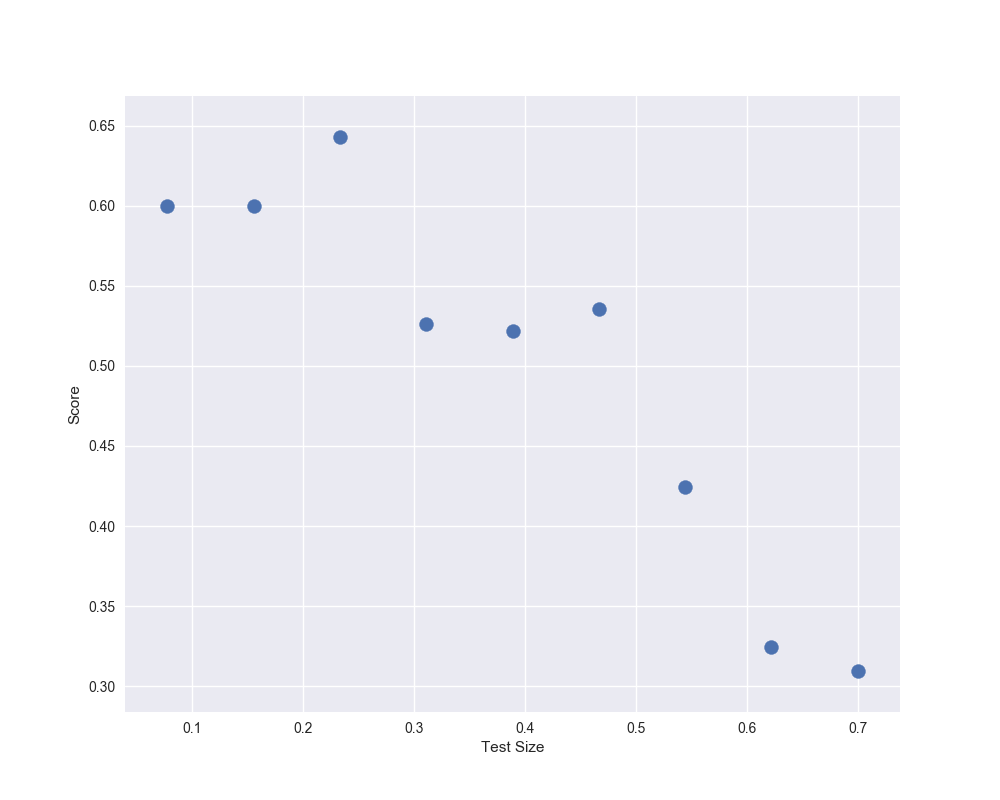

In [23]:
test_sizes = np.linspace(0, 0.7, 10)[1:]
xcols = 'width height mass'.split()
X = fruits[xcols]
y = fruits.fruit_label

scores = []
for test_size in test_sizes:
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=42)
    print(f"X_train size = {len(X_train)}  X_test size = {len(X_test)}")
    knn = KNeighborsClassifier(n_neighbors=6)
    knn.fit(X_train, y_train)
    scores.append(knn.score(X_test, y_test))

fig, ax = plt.subplots(figsize=(10,8))
ax.scatter(test_sizes, scores, marker='o', s=100)
ax.set_xlabel('Test Size')
ax.set_ylabel('Score')

In [24]:
xcols = 'width height mass'.split()
X = fruits[xcols]
y = fruits.fruit_label
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

knn = KNeighborsClassifier(n_neighbors=6, weights='uniform')
knn.fit(X_train, y_train)

x1_train, x1_test, y1_train, y1_test = train_test_split(X_train, y_train, test_size=.5)

predicted = pd.Series(knn.predict(x1_train)).map(lookup_fruit_name)
actual = y1_train.reset_index(drop=True).map(lookup_fruit_name)

df = pd.DataFrame({'predicted': predicted, 'actual': actual})
df['Corret'] = df.predicted == df.actual
df

,actual,predicted,Corret
0,orange,orange,True
1,apple,apple,True
2,orange,apple,False
3,lemon,orange,False
4,orange,apple,False
5,apple,apple,True
6,mandarin,mandarin,True
7,orange,apple,False
8,lemon,orange,False
9,orange,orange,True


In [25]:
sum(df.Corret)/len(df)

0.59090909090909094

In [26]:
knn.score(x1_train, y1_train)

0.59090909090909094

,actual,predicted
0,lemon,lemon
1,orange,apple
2,lemon,lemon
3,apple,apple
4,apple,orange
5,orange,orange
6,mandarin,mandarin
7,apple,apple
8,orange,apple
9,orange,apple
